<h1> BirdNet: Classify Bird Species </h1>
<p> Based on the TensorFlow tutorial <a href="https://www.tensorflow.org/tutorials/images/classification#visualize_the_data"> found here. </a> </p>

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.python.util import compat
tf.executing_eagerly()

True

In [108]:
# Construct a tf.data.Dataset
# We want birds!
DATASET='caltech_birds2010'
SIZE=150

def load_ds(dataset):
    ds = tfds.load(dataset, split='train')
    print("Loaded dataset {}".format(dataset))
    return ds
    
bird_ds = load_ds(DATASET)

Loaded dataset caltech_birds2010


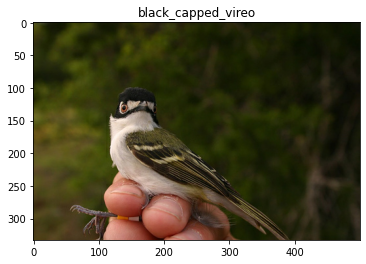

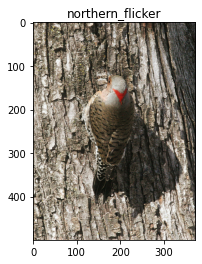

In [110]:
#Show some birds!
def plot_samples(ds, num):
    samples = ds.take(num)  # Grab a couple
    for bird in samples:
        image = bird["image"]
        label_name = str(bird["label_name"].numpy())
        label_name = str.split(label_name,"'")[1]
        plt.figure()
        plt.imshow(image)
        plt.title(label_name)
        
plot_samples(bird_ds,2)

In [111]:
#Resize and normalize training data
def resize_imgs(tensor):
    return tf.image.resize(tensor['image'], (SIZE,SIZE)), tensor['label']

def normalize_imgs(image, label):
    return image / 255.0 , label

def make_imgs(ds):
    print("Resizing dataset......./")
    resized_dataset = ds.map(map_func=resize_imgs)
    print("Normalizing dataset......./")
    normalized_dataset = resized_dataset.map(map_func=normalize_imgs)
    print("Done!")
    return normalized_dataset

normalized_dataset = make_imgs(ds)

Resizing dataset......./
Normalizing dataset......./
Done!


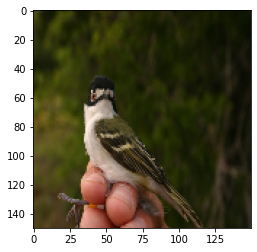

150


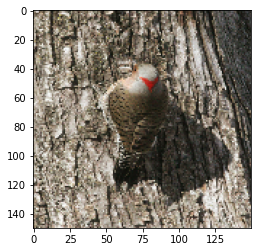

35


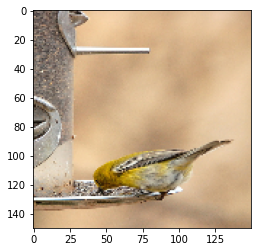

174


In [114]:
#Show some resized guys
def show_resized(normalized_dataset,num):
    for index, (image, label) in enumerate(normalized_dataset):
        plt.imshow(image)
        plt.show()
        print(label.numpy())
        if index >=(num-1): 
            break
            
show_resized(normalized_dataset,3)

In [151]:
num_classes = 200 #200 birds

model = Sequential([
    #random permutation to avoid overfitting
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='leaky_relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='leaky_relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

print("Model compiled.")

Model compiled.


In [ ]:
BATCH_SIZE = 8
EPOCH_NUM= 15
STEP_NUM = len(ds)/BATCH_SIZE
print("Batch size: {}, epochs: {}, steps_per_epoch: {}".format(
    BATCH_SIZE,EPOCH_NUM,STEP_NUM))
#training dataset batch
dataset = normalized_dataset.repeat().batch(BATCH_SIZE)
model.fit(dataset, steps_per_epoch=STEP_NUM, epochs=EPOCH_NUM, shuffle=True)
model.summary()

Batch size: 8, epochs: 15, steps_per_epoch: 375.0
Epoch 1/15
375/375 [==============================] - 105s 278ms/step - loss: 5.4811 - accuracy: 0.0117
Epoch 2/15
375/375 [==============================] - 97s 259ms/step - loss: 4.8203 - accuracy: 0.0517
Epoch 3/15
375/375 [==============================] - 100s 267ms/step - loss: 4.3917 - accuracy: 0.1060
Epoch 4/15
375/375 [==============================] - 107s 285ms/step - loss: 3.9829 - accuracy: 0.1780
Epoch 5/15
375/375 [==============================] - 93s 249ms/step - loss: 3.6745 - accuracy: 0.2330
Epoch 6/15
208/375 [===============>..............] - ETA: 40s - loss: 3.4222 - accuracy: 0.2722

In [136]:
#evaluate performance
test_dataset = tfds.load(DATASET, split='test')
test_dataset = test_dataset.map(map_func=resize_imgs).map(map_func=normalize_imgs).batch(BATCH_SIZE)
model.evaluate(test_dataset)

356/380 [===========================>..] - ETA: 1s - loss: 9.3054 - accuracy: 0.0428

KeyboardInterrupt: 